Name: Mio Tomita<br>
First Submission Date: June 25, 2022<br>
Second Submission Date: June 27, 2022

# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

## Read in the file `craftcans.csv`, and look at the first first rows

In [12]:
#retrieve raw data
df = pd.read_csv('craftcans.csv')

In [18]:
df.head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42


## How many rows do you have in the data? What are the column types?

In [19]:
#number of rows in the data
df.shape[0]

2416

In [20]:
#data types of each columns
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [21]:
#top 10 producers
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [26]:
#clean data and cast it as float
df.ABV = df.ABV.str.replace('%','').astype(float)

In [27]:
#mean
df.ABV.mean()

5.977342419080068

In [30]:
#median
df.ABV.median()

5.6

In [28]:
#mode
df.ABV.mode().values[0]

5.0

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [31]:
#show ABV column
df.ABV

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is usually used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells*

In [32]:
#I've done this in 2.2
#df.ABV = df.ABV.str.replace('%','')

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [12]:
#I've done this in 2.2
#but in case I need to remove it here:

#df.ABV = df.ABV.astype(float)

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [33]:
# show the median/mean/etc
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

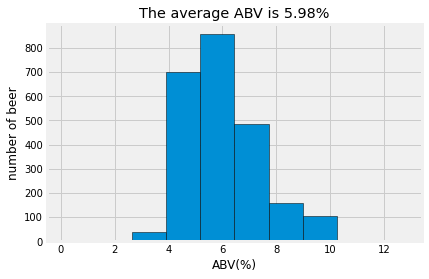

In [34]:
#chart of ABV distribution
df.ABV.hist(ec="k")
plt.title(f"The average ABV is {df.ABV.mean():.2f}%")
plt.xlabel('ABV(%)')
plt.ylabel('number of beer')
plt.show()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isna()` or `notna()` to see where a column is missing/not missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [35]:
#the number of missing beers
df.ABV.isna().sum()

68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [36]:
#top 10 cities for the canned craft beer 1
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

In [45]:
print(df.Location.value_counts().head(10).index.to_list())

['Grand Rapids, MI', 'Chicago, IL', 'Portland, OR', 'Indianapolis, IN', 'San Diego, CA', 'Boulder, CO', 'Denver, CO', 'Brooklyn, NY', 'Seattle, WA', 'Longmont, CO']


## List all of the beer from Brooklyn, NY

In [55]:
#check location names
[location for location in df.Location.unique() if "Brooklyn" in str(location)]

['Brooklyn, NY', 'Brooklyn Center, MN']

In [60]:
#list for all the beers from Brooklyn, NY
df.query("Location=='Brooklyn, NY'").Beer.to_list()

['4Beans',
 'Jammer',
 'Abigale',
 'Nomader Weiss',
 'Rad',
 'Molotov Lite',
 'Bengali',
 'Sensi Harvest',
 'Hi-Res',
 'KelSo Nut Brown Lager',
 'Global Warmer',
 'Autumnation (2013)',
 'KelSo India Pale Ale',
 'The Crisp',
 'Sweet Action',
 'Righteous Ale',
 'Bengali Tiger',
 'KelSo Pilsner',
 'Hipster Ale (Two Roads Brewing)',
 'Bikini Beer',
 'East India Pale Ale',
 '3Beans',
 'Brownstone',
 'Brooklyn Summer Ale',
 'Hipster Ale (Westbrook Brewing)',
 'Apollo',
 'Harbinger',
 'Resin',
 'East India Pale Ale',
 'Diesel',
 'Autumnation (2011-12) (2011)',
 'The Crisp (2011)',
 'Sweet Action (2011)',
 'Righteous Ale (2011)',
 'Bengali Tiger (2011)',
 'Brooklyn Summer Ale (2011)',
 'Brooklyn Lager (16 oz.)',
 'Brooklyn Lager (12 oz.)']

## What brewery in Brooklyn puts out the most types of canned beer?

In [74]:
#Brewery in Brooklyn that puts put the most beer
df.query("Location=='Brooklyn, NY'").Brewery.value_counts().head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

In [85]:
#Brooklyn beers
brooklyn = df.query("Location=='Brooklyn, NY'")

<AxesSubplot:ylabel='Brewery'>

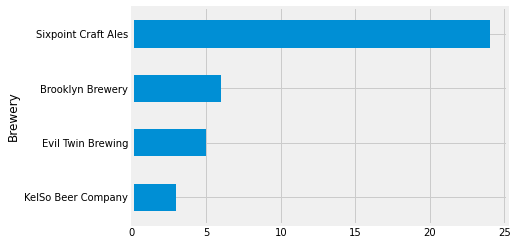

In [105]:
#number of styles each breweries in Brooklyn puts out
brooklyn.groupby('Brewery').Style.count().sort_values().plot(kind='barh')

## What are the five styles of beer that Sixpoint produces the most cans of?

In [89]:
#the five styles of beer that Sixpoint produces the most cans of
df.query("Brewery=='Sixpoint Craft Ales'").Style.value_counts().head(5)

American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match **part** of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [123]:
#create a new column "state"
df['state'] = df.Location.str.extract('.*,\s(.*)')

In [128]:
#Breweries in New York state
df.query("state=='NY'").Brewery.unique()

array(['Sixpoint Craft Ales', 'Evil Twin Brewing', 'Chatham Brewing',
       'Newburgh Brewing Company', 'Southampton Publick House',
       'Montauk Brewing Company', 'Matt Brewing Company',
       'The Bronx Brewery', 'KelSo Beer Company', 'Brooklyn Brewery',
       'The Manhattan Brewing Company', 'Blue Point Brewing Company',
       'Bomb Beer Company', 'Dundee Brewing Company',
       'Upstate Brewing Company', 'Butternuts Beer and Ale'], dtype=object)

### Now *count* all of the breweries in New York state

In [130]:
#number of all breweries in New York state
df.query("state=='NY'").Brewery.nunique()

16

In [131]:
#numbers of beers each breweries in New York State are producing
df.query("state=='NY'").Brewery.value_counts()

Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
The Bronx Brewery                 3
KelSo Beer Company                3
Chatham Brewing                   2
Montauk Brewing Company           2
Bomb Beer Company                 2
Upstate Brewing Company           2
Newburgh Brewing Company          1
Southampton Publick House         1
The Manhattan Brewing Company     1
Dundee Brewing Company            1
Name: Brewery, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [132]:
#Display IPAs
df[df.Style.str.contains('IPA', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50,MN
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65,KY
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100,CA
...,...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120,MN
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99,MN
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65,CA
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100,CO


IPAs are usually pretty hoppy and bitter (although I guess hazy IPAs and session IPAs are changing that since I first made this homework!). IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [137]:
#IBU median 
pd.to_numeric(df.IBUs, errors='coerce').median()

35.0

In [140]:
#IBU mean
pd.to_numeric(df.IBUs, errors='coerce').mean()

42.71316725978647

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [146]:
#check what kinds of non-numeric data are mixed in
df[~df.IBUs.str.isnumeric().replace(np.nan, False)].IBUs.unique()

array(['Does not apply', nan], dtype=object)

In [147]:
#replace "Does not apply" manually
#cast as float
df.IBUs = df.IBUs.replace('Does not apply',np.nan).astype(float)

In [150]:
#average IBUs
df.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*

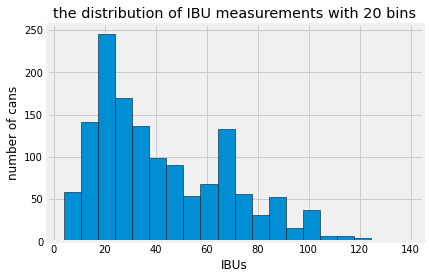

In [151]:
#the distribution of IBU measurements
df.IBUs.hist(ec="k",bins=20)
plt.title('the distribution of IBU measurements with 20 bins')
plt.xlabel('IBUs')
plt.ylabel('number of cans')
plt.show()

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [152]:
#75th percentile
df.IBUs.quantile(0.75)

64.0

In [153]:
#summary statistics
df.IBUs.describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [154]:
#all the beers with IBUs above the 75th percentile
#filter
high_ibu= df[df.IBUs>df.IBUs.quantile(0.75)]
high_ibu

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,KY
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,KY
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0,MA
...,...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,CA
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0,CO
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,CO
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0,CO


In [155]:
#show all the names of high IBU beer
high_ibu.Beer.to_list()

['Citra Ass Down',
 'London Balling',
 'Rico Sauvin',
 'Pile of Face',
 'Excess IPL',
 'Hoponius Union',
 'Habitus (2014)',
 'Solis',
 'Habitus',
 'Yeti Imperial Stout',
 "98 Problems (Cuz A Hop Ain't One)",
 'Train Hopper',
 'Csar',
 'Saucy Intruder',
 'The Gadget',
 'Gone A-Rye',
 'Heavy Lifting',
 'Jah Mon',
 'Flying Mouse 4',
 'Citra Ass Down',
 'Soul Doubt',
 'Bimini Twist',
 'Long Leaf',
 'Double Duckpin',
 'Hop A-Peel',
 'Wobble',
 'Hopkick Dropkick',
 'Union Jack',
 'India Pale Ale',
 'Self Starter',
 'Nugget Nectar',
 'Mission IPA',
 'Bay of Bengal Double IPA (2014)',
 'Newport Storm IPA',
 'Clean Shave IPA',
 'Big Star White IPA',
 'Firestarter India Pale Ale',
 'Back Bay IPA',
 '4000 Footer IPA',
 'Unchained #18 Hop Silo',
 'Harness the Winter',
 'Rule G IPA',
 'Yellow Wolf Imperial IPA',
 'Third Eye Enlightened Pale Ale',
 'The Green Room',
 '2014 IPA Cicada Series',
 'Sinister Minister Black IPA',
 'O’Malley’s IPA',
 'Perpetual Darkness',
 'Watershed IPA',
 'Hoodoo Voodoo 

## List all of the beers with IBUs below the 25th percentile

In [156]:
#all the beers with IBUs above the 75th percentile
filter
low_ibu = df[df.IBUs<df.IBUs.quantile(0.25)]
low_ibu

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,MN
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0,KY
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0,KY
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0,KY
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0,MA
...,...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.0,20.0,TX
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0,HI
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0,PA
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0,MN


In [157]:
#show all the names of low IBU beer
low_ibu.Beer.to_list()

["Wall's End",
 "Sho'nuff",
 'Bloody Show',
 'The Brown Note',
 'House Lager',
 'Leisure Time',
 'Park',
 'Westfalia',
 'KSA',
 'Sparkle',
 'Hotbox Brown',
 'Gold',
 'Cafe Leche',
 'Damascene Apricot Sour',
 'Sex Panther',
 'Vanilla Porter',
 'Gose',
 'Vermont Pilsner',
 'Ginger Peach Saison',
 'Weissenheimer',
 'Passion Fruit Prussia',
 'Send Help',
 'The Brown Note',
 'Daft Funk',
 'Bat Outta Helles',
 'Rye Wit',
 'Yo Soy Un Berliner',
 "Farmer's Daughter Blonde",
 'Honey Rye',
 'Honey Badger Blonde',
 'Old Pro',
 'Vanilla Java Porter',
 'Saddle Bronc Brown Ale',
 'Bomber Mountain Amber Ale',
 'Jammer',
 'Blackberry Wheat',
 'Rhode Island Blueberry',
 'Watermelon Ale',
 'Watermelon Ale',
 'Bunker Hill Blueberry Ale',
 'Deception',
 'P-Town Pilsner',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop',
 'Nonstop Hef Hop'

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [180]:
pd.options.display.max_rows = None

In [208]:
#List the median IBUs of each type of beer
ibu_by_type = df.groupby('Style').IBUs.median().sort_values(na_position='first').sort_values()
ibu_by_type

Style
Berliner Weissbier                      8.0
American Adjunct Lager                  9.0
Gose                                   10.0
Light Lager                            12.0
Hefeweizen                             15.0
Herbed / Spiced Beer                   15.0
Fruit / Vegetable Beer                 15.5
Witbier                                15.5
Dunkelweizen                           16.0
English Pale Mild Ale                  16.0
Other                                  16.0
Munich Helles Lager                    18.0
American Pale Lager                    18.5
Cream Ale                              20.0
Keller Bier / Zwickel Bier             20.0
Pumpkin Ale                            20.0
Roggenbier                             20.0
American Pale Wheat Ale                20.0
American Blonde Ale                    20.0
English Brown Ale                      20.5
Belgian Pale Ale                       21.0
Radler                                 21.0
Munich Dunkel Lager       

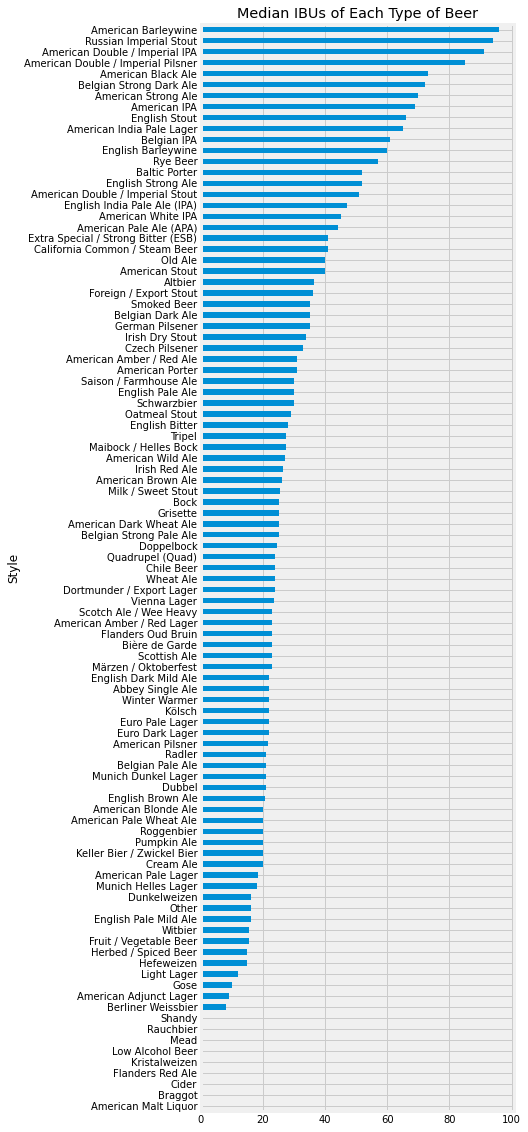

In [185]:
#graph
ibu_by_type.sort_values(na_position='first')\
    .plot(title='Median IBUs of Each Type of Beer', kind='barh', figsize=(5,20))
plt.show()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [187]:
#the most common 5 styles of high-IBU beer
high_ibu.Style.value_counts().head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

In [188]:
#the most common 5 styles of low-IBU beer
low_ibu.Style.value_counts().head(5)

American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [189]:
#look up for wheaty styles
df[df.Style.str.contains('Wheat', na=False, case=False)].Style.unique()

array(['Wheat Ale', 'American Pale Wheat Ale', 'American Dark Wheat Ale'],
      dtype=object)

In [190]:
#list of wheat beers
wheaty_list = [
    'Witbier', 
    'Hefeweizen',
    'American Pale Wheat Ale',
    'American Dark Wheat Ale',
    'Wheat Ale',    
]

In [191]:
#filtered data
wheat_beer = df[df.Style.isin(wheaty_list)]

In [192]:
#the average IBU of wheat beers
wheat_beer.IBUs.mean()

19.389830508474578

## Draw a histogram of the IBUs of those beers

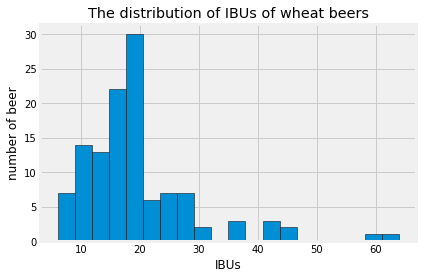

In [193]:
#histogram
wheat_beer.IBUs.hist(ec="k", bins=20)
plt.title('The distribution of IBUs of wheat beers')
plt.xlabel('IBUs')
plt.ylabel('number of beer')
plt.show()

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [194]:
#filter
ipa_beer = df[df.Style.str.contains('IPA', na=False)]

In [195]:
#average
ipa_beer.IBUs.mean()

71.94897959183673

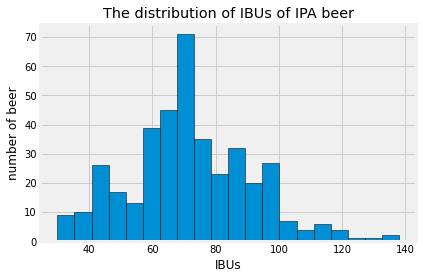

In [196]:
#histogram
ipa_beer.IBUs.hist(ec="k", bins=20)
plt.title('The distribution of IBUs of IPA beer')
plt.xlabel('IBUs')
plt.ylabel('number of beer')
plt.show()

## Plot those two histograms on top of one another

To plot two plots on top of one another, you *might* just be able to plot twice in the same cell. It depends on your version of pandas/matplotlib! If it doesn't work, you'll need do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

And then youull get two plots on top of each other. They won't be perfect because the bins won't line up without extra work, but it's fine!

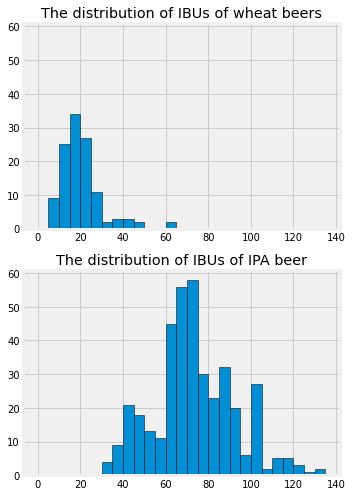

In [197]:
#Compare IBUs distribution of wheat beers and IPAs
fig = plt.figure(figsize=(5,7))
bins = range(0,140,5)

#chart1: wheat beer
ax1 = fig.add_subplot(2, 1, 1)
ax1 = wheat_beer.IBUs.hist(ec="k", bins=bins)
ax1.set_title('The distribution of IBUs of wheat beers')

#chart2: IPAs
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1, sharey=ax1)
ax2 = ipa_beer.IBUs.hist(ec="k", bins=bins)
ax2.set_title('The distribution of IBUs of IPA beer')

fig.tight_layout()


plt.show()

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

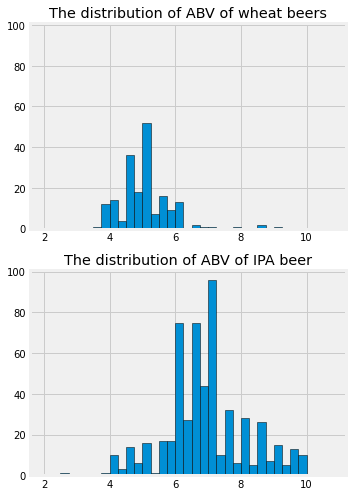

In [198]:
#Compare ABV distribution of wheat beers and IPAs
fig = plt.figure(figsize=(5,7))

bins = np.arange(2.0, 11.0, 0.25)

#chart1: wheat beer
ax1 = fig.add_subplot(2, 1, 1)
ax1 = wheat_beer.ABV.hist(ec="k", bins=bins)
ax1.set_title('The distribution of ABV of wheat beers')

#chart2: IPAs
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1, sharey=ax1)
ax2 = ipa_beer.ABV.hist(ec="k", bins=bins)
ax2.set_title('The distribution of ABV of IPA beer')


fig.tight_layout()
plt.show()

## Good work!

For making it this far, your reward is my recommendation for Athletic Brewing Co.'s products as the best non-alcoholic beer on the market. Their Run Wild IPA and Upside Dawn are both very solid.

In [199]:
#check if there is any data for the non-alcoholic beer
#Either way, I'll definitly try that one!
df[df.Brewery.str.contains('Athletic', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,state
